In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [5]:
df = pd.read_csv('games.csv', delimiter=',')

In [17]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [10]:
df.dropna(inplace = True)

In [11]:
df.Year = df.Year.astype('int')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


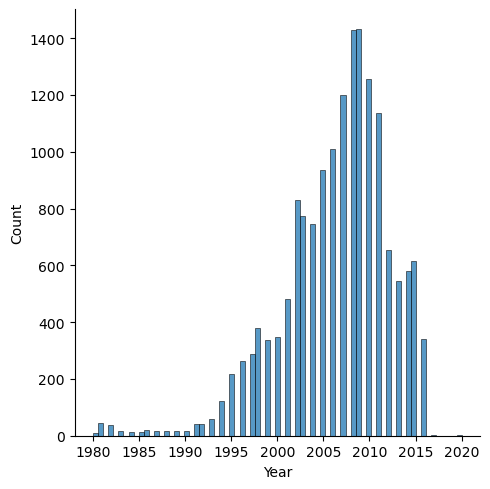

In [16]:

sns.displot(df.Year)

In [27]:
df.groupby('Platform', as_index = False)\
.agg({'Global_Sales' : 'sum'})\
.sort_values("Global_Sales",ascending = False)\
.head(10)

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.60
17,PS3,949.35
26,Wii,909.81
4,DS,818.91
15,PS,727.39
6,GBA,305.62
19,PSP,291.71
18,PS4,278.10
13,PC,254.70


In [76]:
df['Publisher'].value_counts()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

In [33]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]. median ()

NA_Sales       0.08
EU_Sales       0.02
JP_Sales       0.00
Other_Sales    0.01
dtype: float64

In [38]:
q = df.query('Publisher == "Nintendo"')\
.groupby('Genre', as_index = False)\
.agg({'JP_Sales' : 'sum'})\
.sort_values("JP_Sales",ascending = False)\
.head(10)

In [44]:
q['JP_Sales'].median()

32.545

In [43]:
q['JP_Sales'].mean()

43.99499999999999

In [47]:
q['JP_Sales'].describe()

count     10.000000
mean      43.995000
std       33.043256
min       10.460000
25%       25.027500
50%       32.545000
75%       50.710000
max      102.360000
Name: JP_Sales, dtype: float64

In [65]:
ris = df.query('Genre == ["Fighting", "Simulation","Platform","Racing","Sports"]')\
.groupby('Year', as_index = False)\
.agg({'Global_Sales' : 'sum'})

In [66]:
ris

,Year,Global_Sales
0,1980,1.26
1,1981,8.65
2,1982,7.65
3,1983,10.13
4,1984,12.82
5,1985,46.21
6,1986,16.92
7,1987,10.88
8,1988,33.50
9,1989,26.38


<Axes: xlabel='Year', ylabel='Global_Sales'>

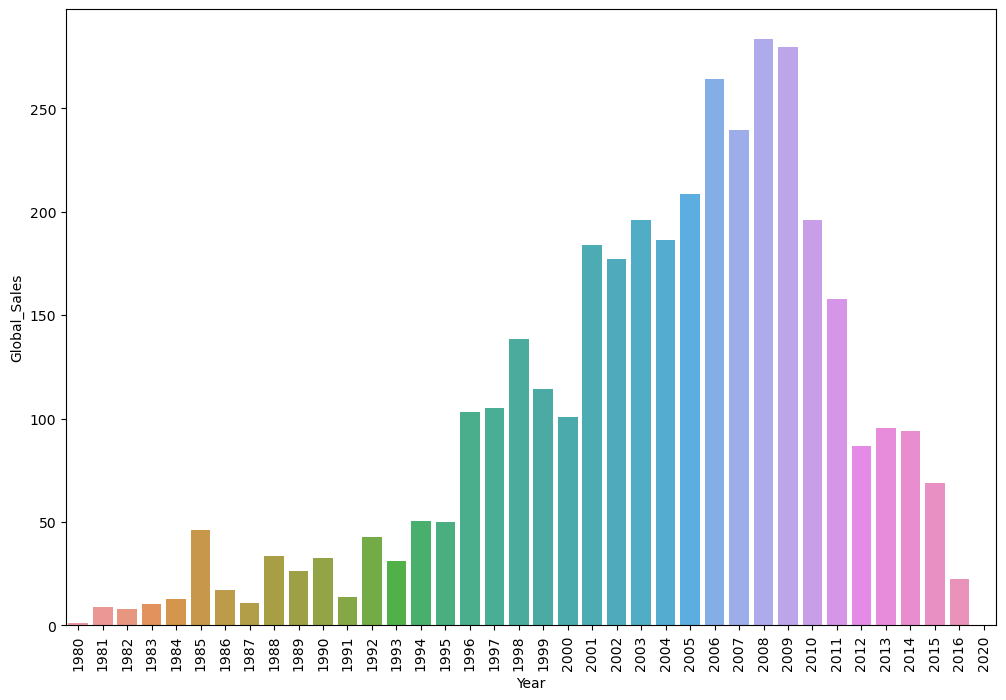

In [75]:
#sns.displot(data = ris, x = 'Year', y = 'Global_Sales' )
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
sns.barplot(x=ris.Year, y = ris.Global_Sales )

In [57]:
ris

,Year,Genre
0,1980,2
1,1981,9
2,1982,9
3,1983,6
4,1984,6
5,1985,7
6,1986,10
7,1987,8
8,1988,8
9,1989,6


AttributeError: 'DataFrame' object has no attribute 'displot'